In [4]:
import numpy as np
from skimage.io import imshow, imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import jaccard_score


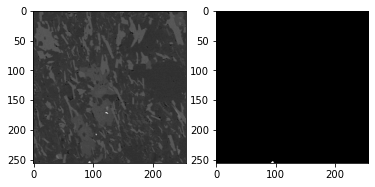

In [5]:
import os, random
from pathlib import Path


def RandomImg(input_dir=Path(r"C:\Users\Ange\Notebooks\test_input"), output_dir=Path(r"\Users\Ange\Notebooks\test_output")):
    img_name = random.choice(list(input_dir.glob('*.png')))
    img_input = imread(img_name)
    img_output = imread(str(img_name).replace('input', 'output'))
    return img_input, img_output, os.path.basename(img_name)

img_input, img_output, img_name = RandomImg()
plt.subplot(121), plt.imshow(img_input, cmap='gray')
plt.subplot(122), plt.imshow(img_output, cmap='gray')
plt.show()

In [6]:
jaccard = []
iterations = 50

for i in range(0,iterations):
    print(f'{int(i/iterations*100)} % ', end = '\r')
    
    # Image random 
    img_input, img_output, imgname = RandomImg()
    img = img_input/255
    img_output = img_output//255

    # Uniformisation
    mean, std = img.mean(), img.std()
    img = (img - mean) / std
    mean, std = img.mean(), img.std()
     
    # Kmeans
    img_n = img.reshape(img.shape[0]*img.shape[1],1)
    kmeans = KMeans(n_clusters=2, random_state=None).fit(img_n)
    img2show = kmeans.labels_
    img_cluster = img2show.reshape(img.shape[0], img.shape[1])
    
    #Jaccard score
    
    jaccard.append(jaccard_score(img_output.flatten(), img_cluster.flatten()))
    
print(np.mean(jaccard))

0.2811996409698668
